In [1]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import animation
import matplotlib.image as mpimg
from scipy.ndimage import rotate
from itertools import product
from tqdm import tqdm
from utils import *

animation.writer = animation.writers['ffmpeg']
plt.rcParams['figure.dpi'] = 400

### Data (solution arrays)

In [2]:
# # Unit is in m/s
# G_moon = 200 # m/s
# altitude = 500. # m
# x_pos = 0. # m? (don't think this really matters)
# entrance_x_vel = 300. # m/s
# pos = (x_pos, altitude)

# Unit is in m/s
# G_moon = 200 # m/s
altitude = 10. # m
x_pos = 5. # m? (don't think this really matters)
entrance_x_vel = 1. # m/s
pos = (x_pos, altitude)

In [9]:
TS, X, Y, XP, YP, UX, UY, TF = lunar_lander(pos, entrance_x_vel, t_steps=10000)

### Basic Info Plots 

Final Time: -0.15971931291165636
Final Position: (2.919, 0.0)


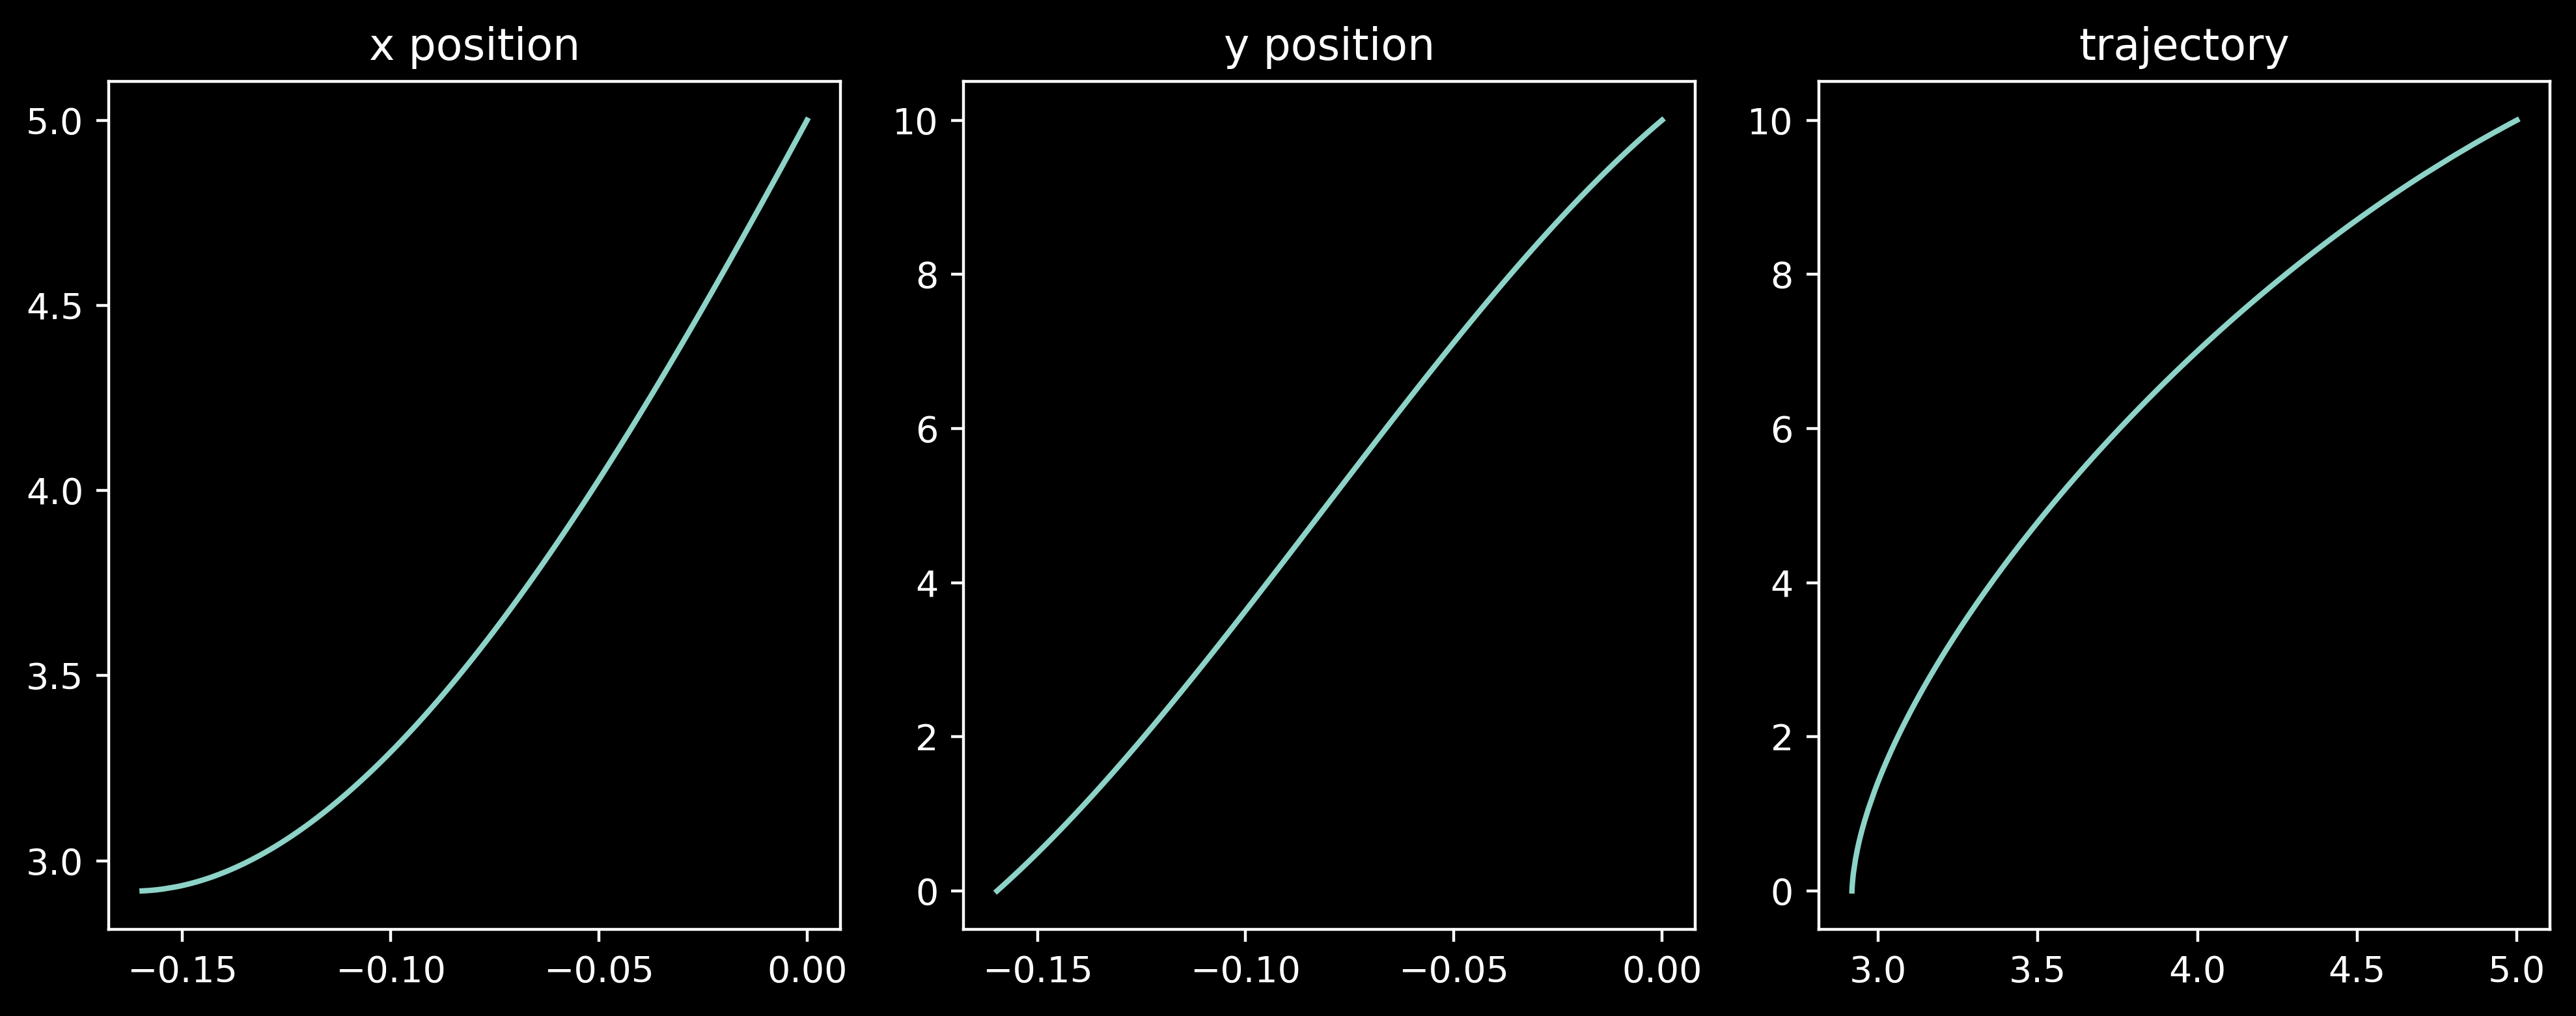

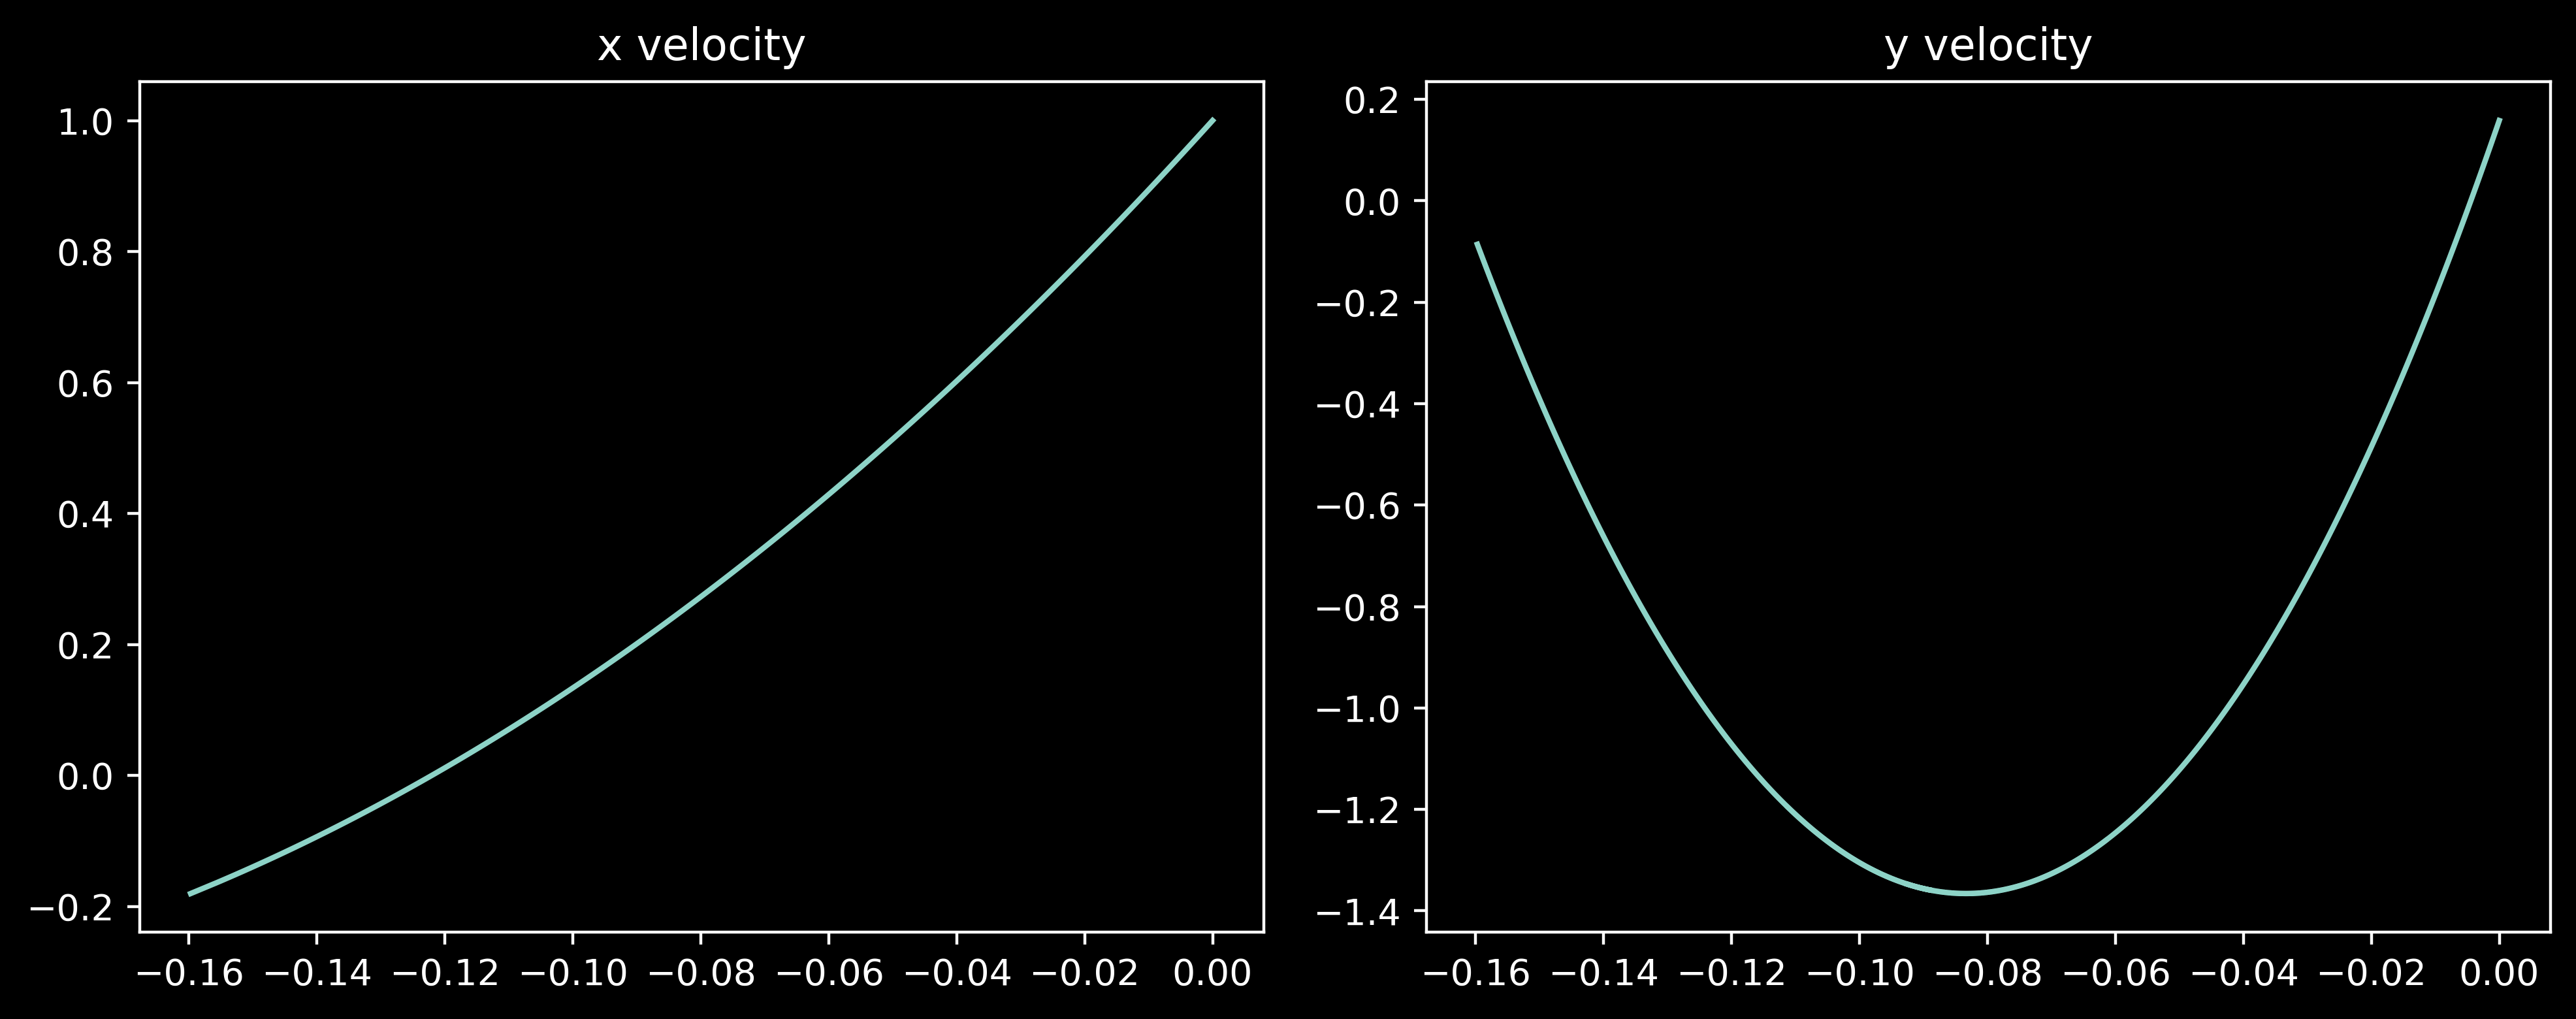

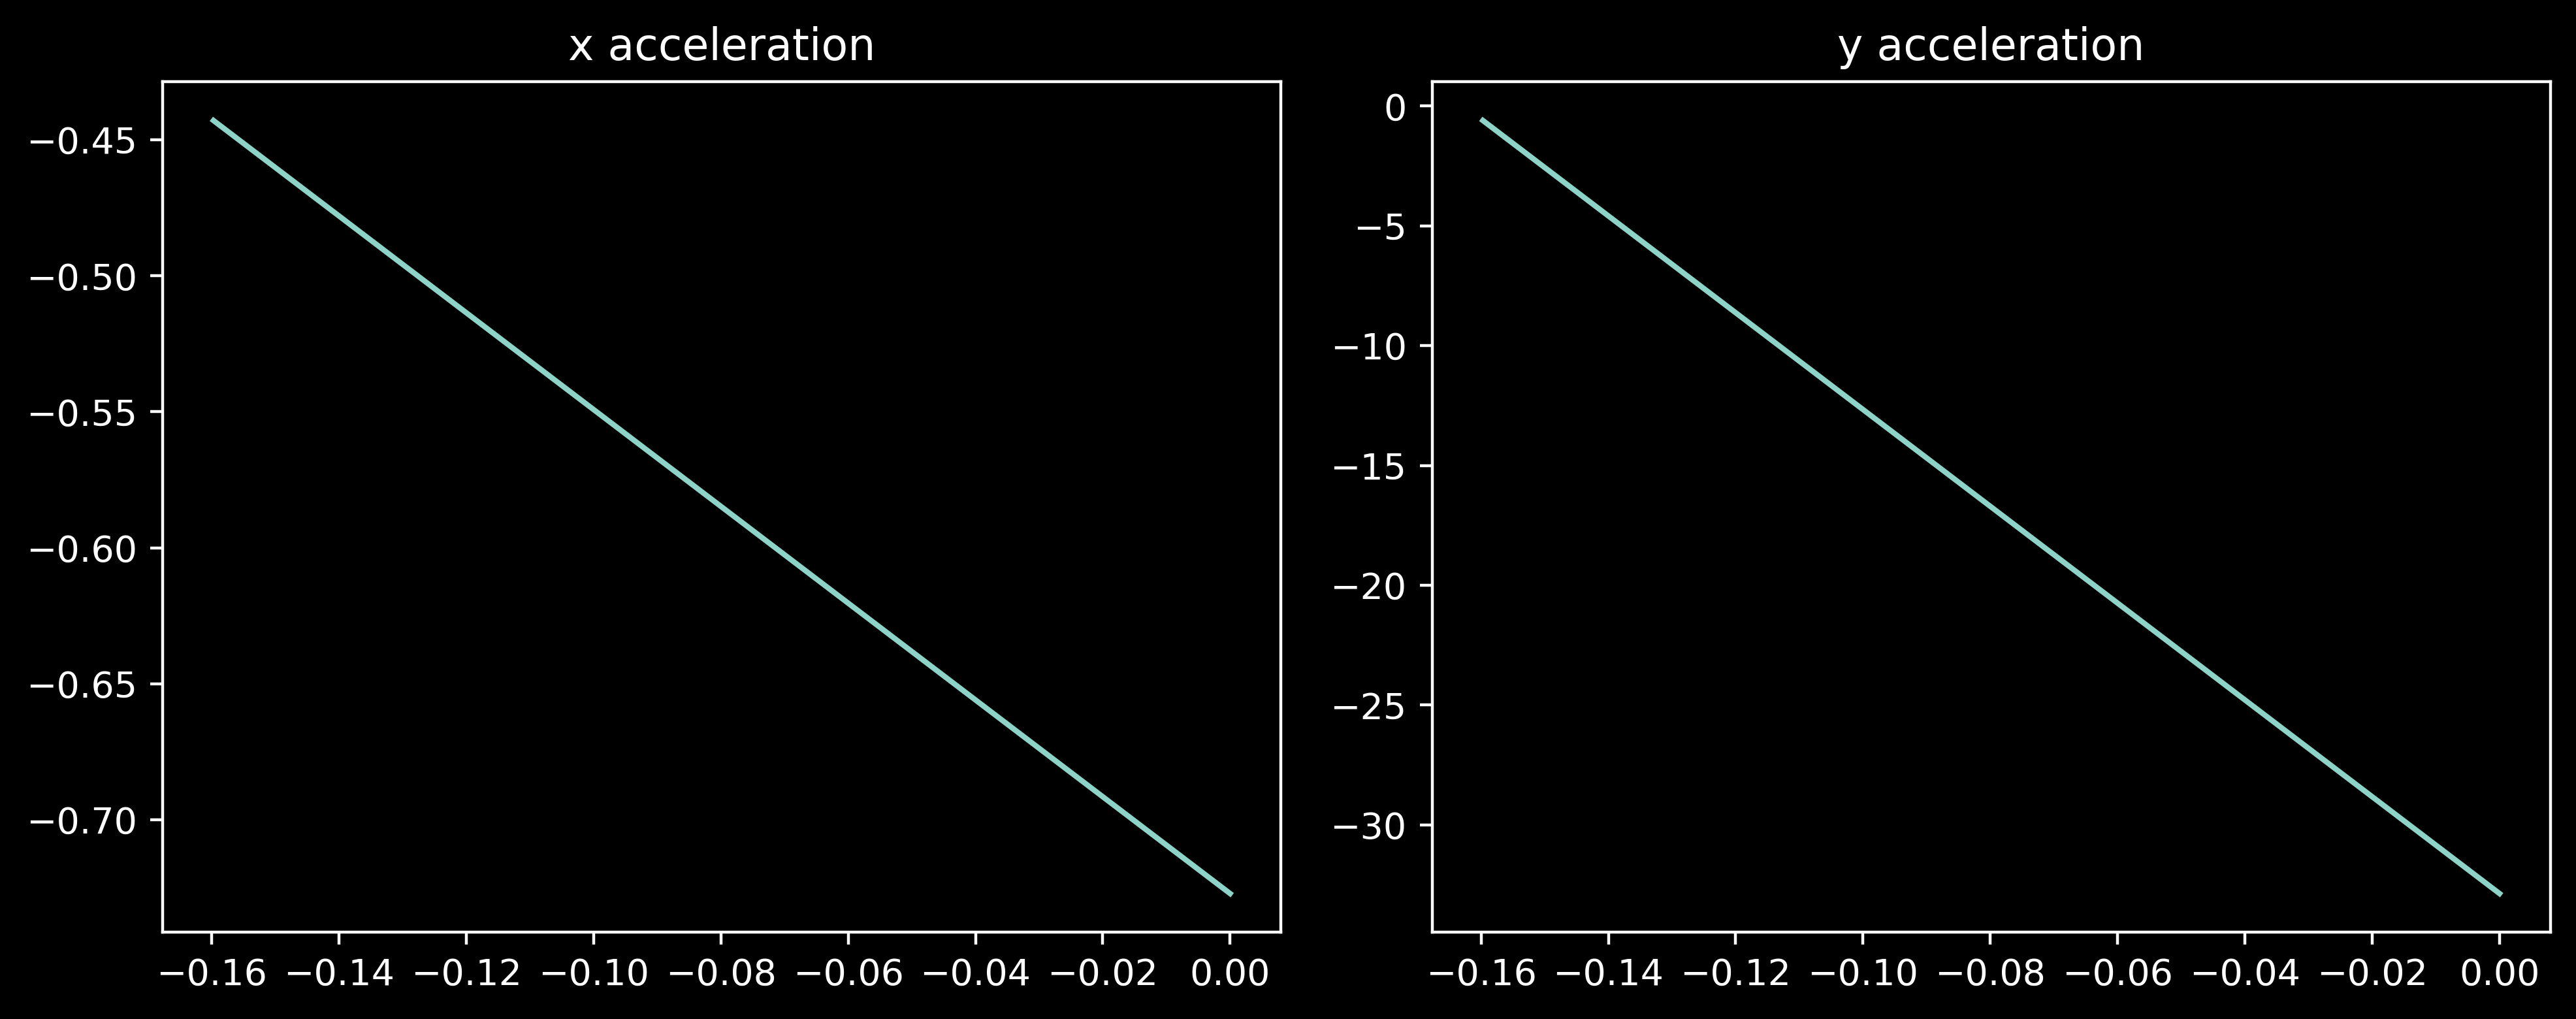

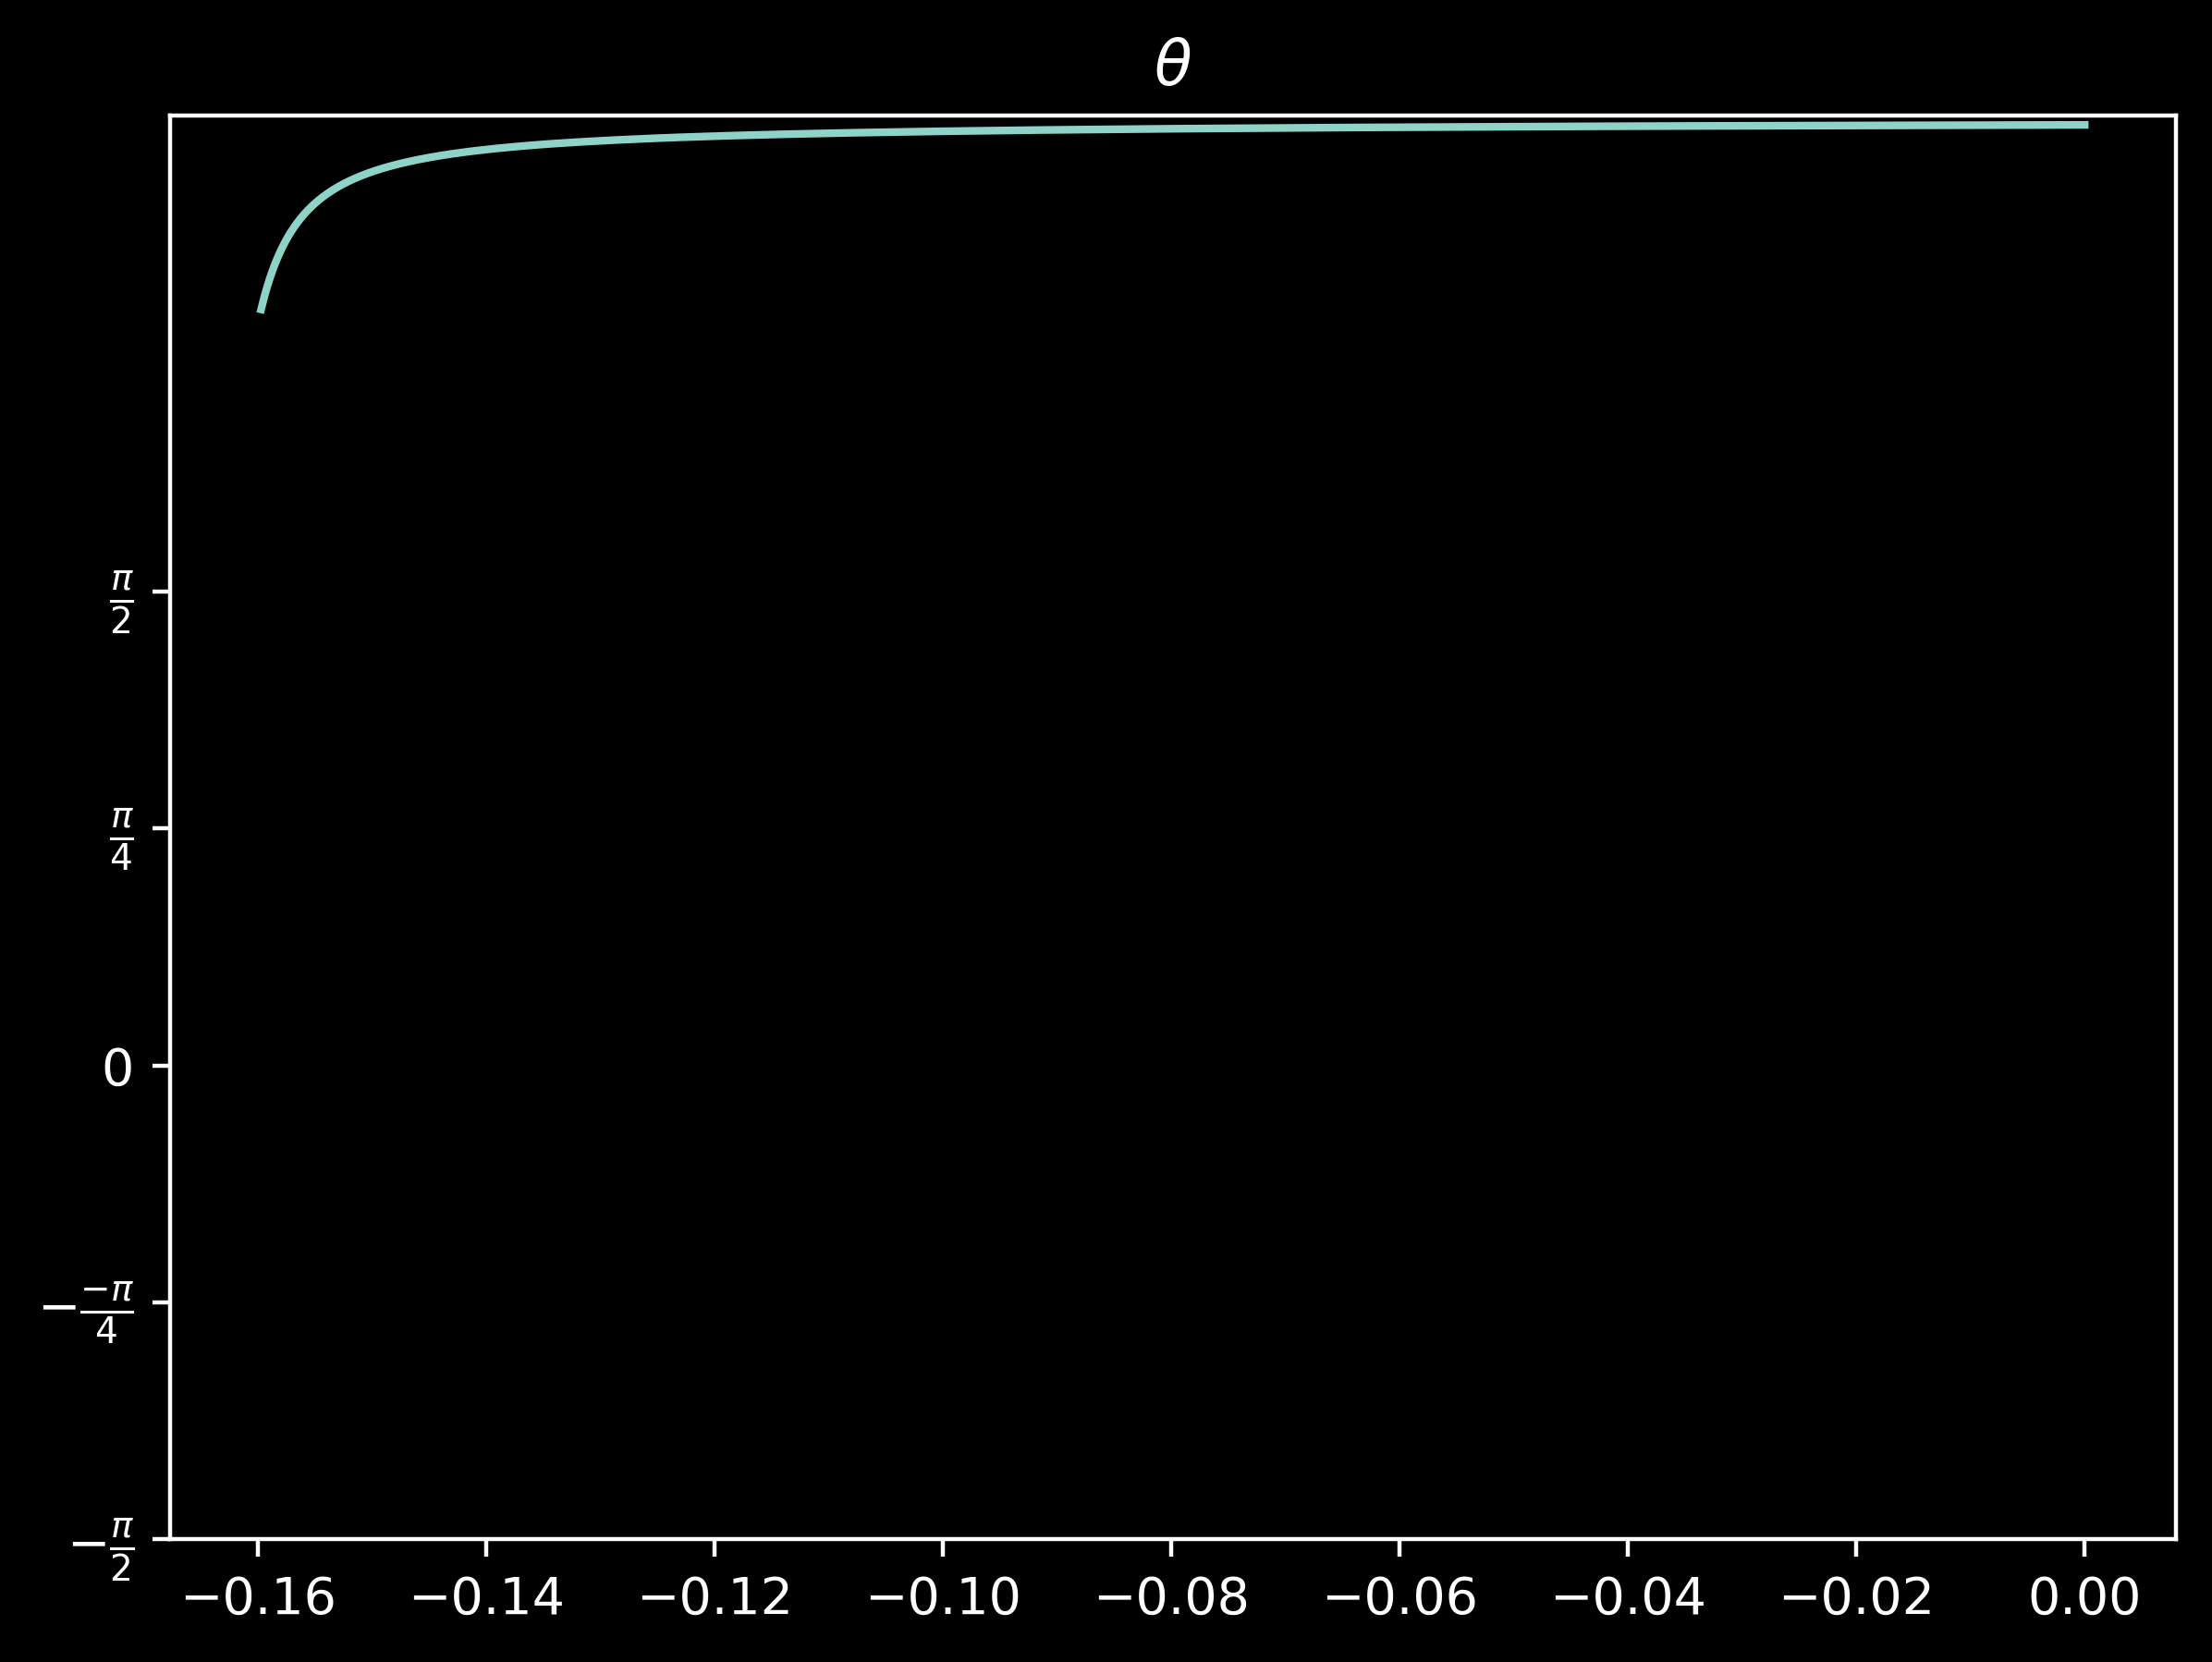

In [10]:
make_plots(TS, X, Y, XP, YP, UX, UY, TF)

### Timelapse Plot

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms

def plot_timelapse(ts=TS, x=X, y=Y, xp=XP, yp=YP, ux=UX, uy=UY, tf=TF, N=7, width=0.3, alpha=None):
    def get_image():
        arr = plt.imread('./lander.png')
        return arr

    def imshow_affine(ax, z, *args, **kwargs):
        im = ax.imshow(z, *args, **kwargs)
        x1, x2, y1, y2 = im.get_extent()
        im._image_skew_coordinate = (x2, y1)
        return im

    # number of appearances
    degrees = np.arctan(uy/ux) + np.pi/2
    trajectory = np.array(list(zip(x, y, degrees)))
    idx = np.round(np.linspace(0, len(trajectory) - 1, N, )).astype(int)
    
    trajectory = np.array(trajectory)[idx]

    # load the image
    lander = get_image()

    # set the width and height of the image
    image_ratio = lander.shape[0]/lander.shape[1]
    height = width*image_ratio # this scales the image so it doesn't get distorted

    # This allows for fading in time
    if alpha is None:
        alpha=1
    else:
        alpha = 0.8*i/len(trajectory)

    # setup the plots
    fig, ax = plt.subplots()
    for i, t in enumerate(trajectory, start=1):
        xi, yi, deg = t
        im = imshow_affine(ax, lander, interpolation='none',
                        extent=[0, width, 0, height], clip_on=True,
                        alpha=alpha)
        center_x, center_y = width//2, height//2
        im_trans = (mtransforms.Affine2D()
                    .rotate_around(center_x, center_y, deg)
                    .translate(xi, yi)
                    + ax.transData)
        im.set_transform(im_trans)

    ax.set_xlim(np.min(trajectory[:, 0]) - 3*width, np.max(trajectory[:, 0]) + 3*width)
    ax.set_ylim(np.min(trajectory[:, 1]) - 3*height, np.max(trajectory[:, 1]) + 3*height)
    plt.show()

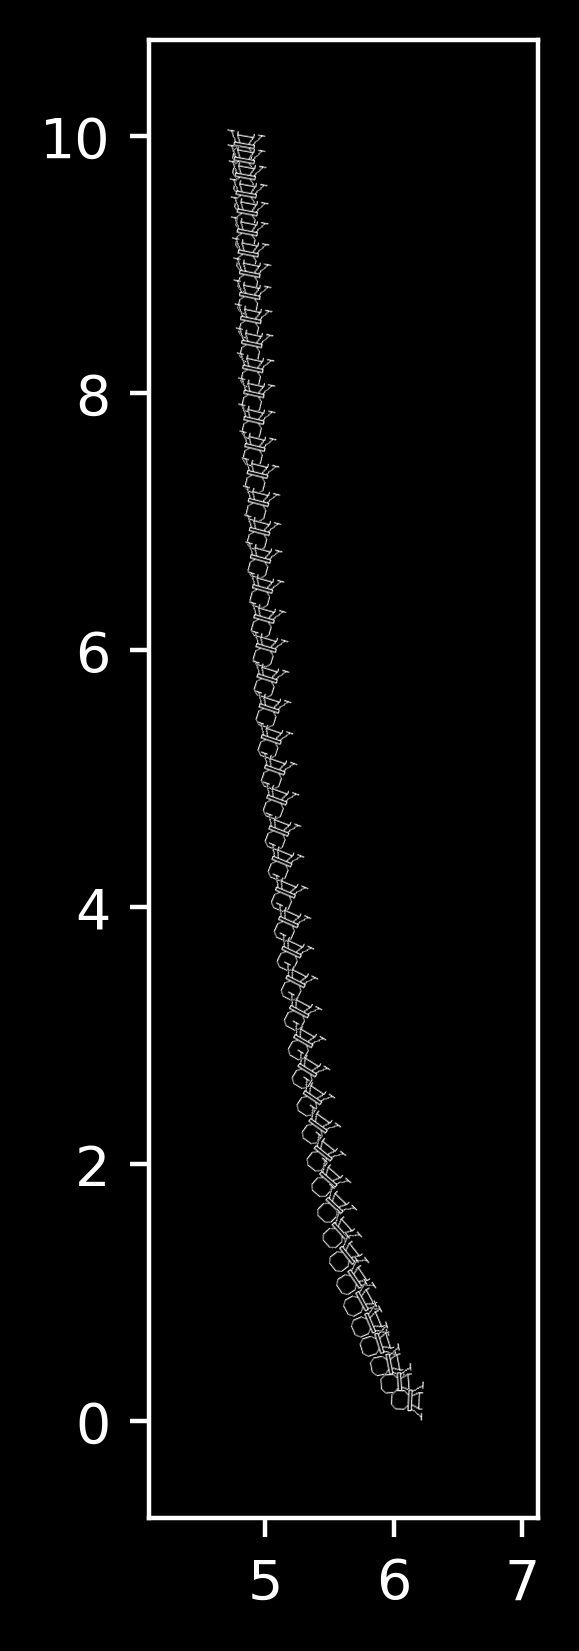

In [6]:
plot_timelapse(width=.3, N=50)

In [7]:
def timelapse_test(ts=TS, x=X, y=Y, xp=XP, yp=YP, ux=UX, uy=UY, tf=TF, N=7, width=0.3, alpha=None):
    def get_image():
        arr = plt.imread('./lander.png')
        return arr

    def imshow_affine(ax, z, *args, **kwargs):
        im = ax.imshow(z, *args, **kwargs)
        x1, x2, y1, y2 = im.get_extent()
        im._image_skew_coordinate = (x2, y1)
        return im

    trajectory = np.array([[0, 0, 0,],
                           [1, 0, 90,]])

    # load the image
    lander = get_image()

    # set the width and height of the image
    image_ratio = lander.shape[0]/lander.shape[1]
    height = width*image_ratio # this scales the image so it doesn't get distorted

    # This allows for fading in time
    if alpha is None:
        alpha=1
    else:
        alpha = 0.8*i/len(trajectory)

    # setup the plots
    fig, ax = plt.subplots()
    for i, t in enumerate(trajectory, start=1):
        xi, yi, deg = t
        im = imshow_affine(ax, lander, interpolation='none',
                        extent=[0, width, 0, height], clip_on=True,
                        alpha=alpha)
        center_x, center_y = width//2, height//2
        im_trans = (mtransforms.Affine2D()
                    .rotate_deg_around(center_x, center_y, deg)
                    .translate(xi, yi)
                    + ax.transData)
        im.set_transform(im_trans)

    ax.set_xlim(0, 1)
    ax.set_ylim(-.1, .3)
    plt.show()

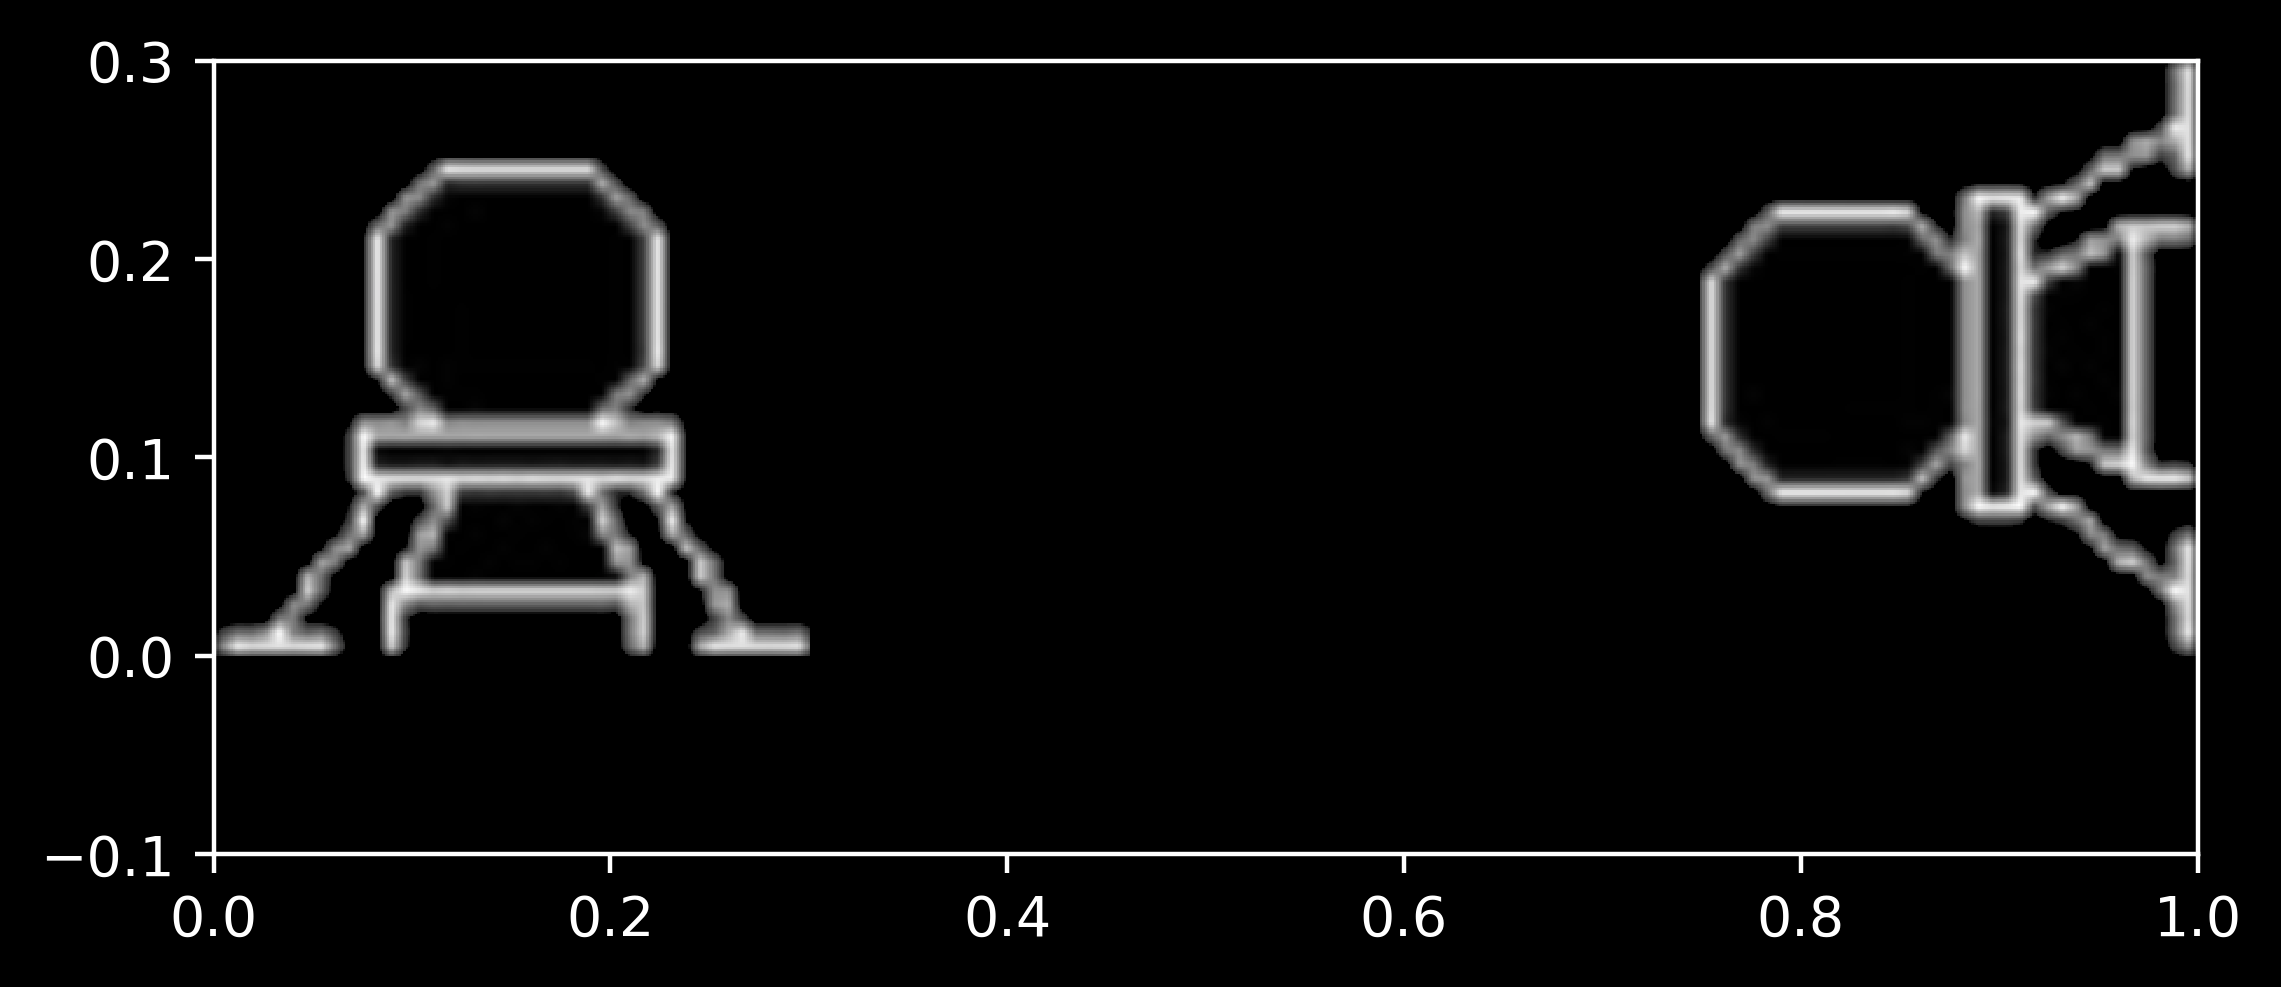

In [8]:
timelapse_test()